## GENSIM Word Vector Visualization of the Various Word Vectors

In [2]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
glove_file = datapath('D:\youtube-nlp\Winter 2019\codes\Lecture 1\glove.6B\glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [12]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [11]:
model.most_similar(negative = 'banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

In [20]:
result = model.most_similar(positive=['india','rich'], negative =['poor'])
print("{}: {:.4f}".format(*result[0]))

pakistan: 0.6253


In [21]:
def analogy(x1,x2,y1):
    result = model.most_similar(positive = [y1,x2], negative=[x1])
    return result[0][0]

In [25]:
analogy('india','major','america')

'american'

In [28]:
print(model.doesnt_match("india rich people poor".split()))

india


In [29]:
def display_pca_scatterplot(model, words = None, sample=0):
    if words == None:
        if sample>0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.vocab]
            
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    
    for word, (x,y) in zip(words,twodim):
        plt.text(x+0.05,y+0.05, word)

<IPython.core.display.Javascript object>


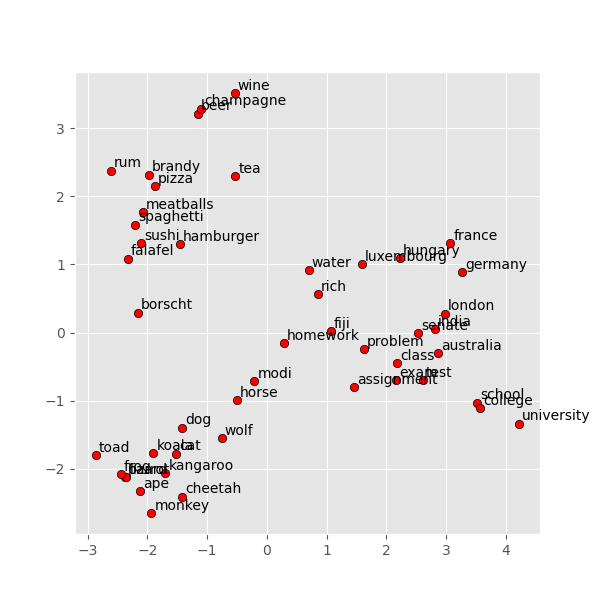

In [40]:
display_pca_scatterplot(model, 
                        ['india', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'rich', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'cheetah', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'london',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'senate','modi'])

<IPython.core.display.Javascript object>


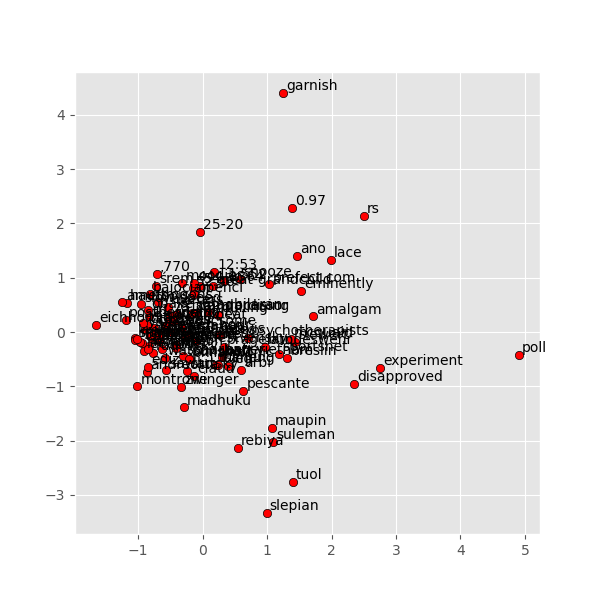

In [32]:
display_pca_scatterplot(model, sample=100)